In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph import datasets
import re

In [2]:
def Load_data(path):
    x_tp = []
    with open(path) as f:
        next(f)
        for line in f:
            #print(len(line))
            x, y = line.split(",")
            x = float(x)
            y = float(y)
            x_tp.append( (x,y) )
            #pos[str(k)] = (x,y)
            #k = k+1
    #data_knn = np.array(x_tp)
    return x_tp
    

In [3]:
def Load_data_dict(path):
    x_t = []
    with open(path) as f:
        next(f)
        for line in f:
            #print(len(line))
            x, y = line.split(",")
            x = float(x)
            y = float(y)
            x_t.append( [x,y] )
            #pos[str(k)] = (x,y)
            #k = k+1
    data_knn = np.array(x_t)
    return x_t

In [4]:
def get_graph_edgelist(path):
    Graph = nx.Graph()
    edges = Load_data(path)
    print(len(edges))
    # Adding edges to the grpah
    Graph.add_edges_from(edges)
    return Graph
    

In [5]:
def draw_graph(graph):
    plt.figure(figsize=(15, 15))
    plt.axes().set(aspect="equal")
    pos = nx.spring_layout(graph, seed = 100) 
    nx.draw(graph, pos,node_size= 10)
    plt.show()
    

5429


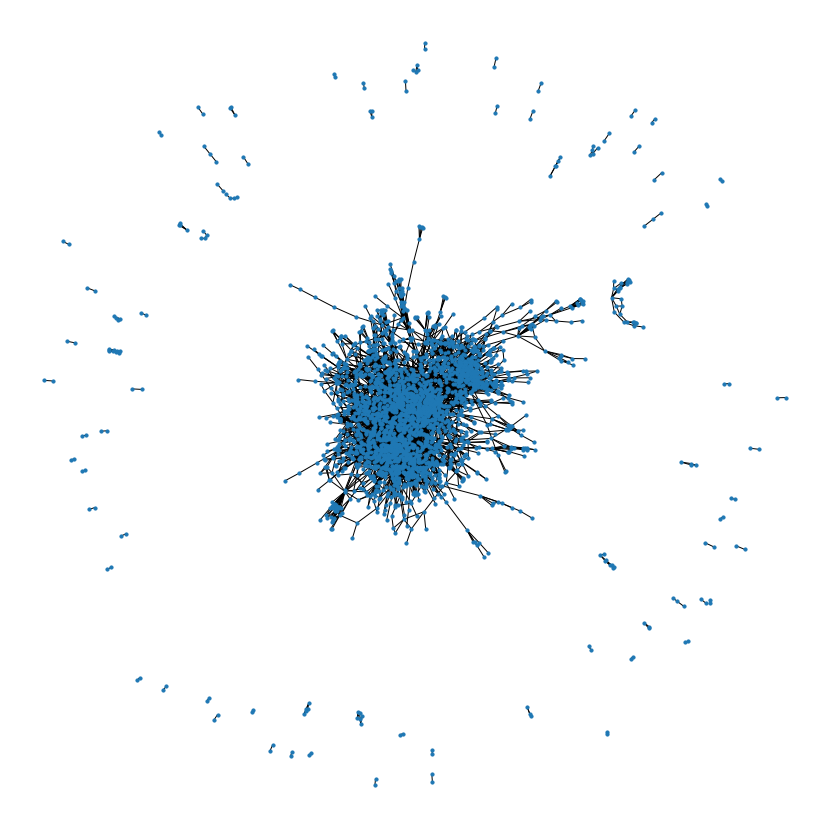

In [6]:
path_edge_list = "D:\MSCS\GraphMining\GM_VE\gm_project\data\datasets-master\cora\cora_cites.csv"
graph = get_graph_edgelist(path_edge_list)
draw_graph(graph)

In [7]:
def get_largest_connected_graph(graph):
    new_edge_list = []
    edges = Load_data_dict("D:\MSCS\GraphMining\GM_VE\gm_project\data\datasets-master\cora\cora_cites.csv")
    
        
    return edges

In [8]:
edg_array = np.array(get_largest_connected_graph(graph))

In [9]:
edg_array

array([[3.500000e+01, 1.033000e+03],
       [3.500000e+01, 1.034820e+05],
       [3.500000e+01, 1.035150e+05],
       ...,
       [8.531180e+05, 1.140289e+06],
       [8.531550e+05, 8.531180e+05],
       [9.543150e+05, 1.155073e+06]])

In [10]:
edg_array[:,1]

array([1.033000e+03, 1.034820e+05, 1.035150e+05, ..., 1.140289e+06,
       8.531180e+05, 1.155073e+06])

In [11]:
largest_cc = max(nx.connected_components(graph), key=len)
largest_cc_array = np.array(list(largest_cc))


In [12]:
new_edg_list = []
for i in edg_array:
    if i[0] in largest_cc_array or i[1] in largest_cc_array:
        new_edg_list.append(i)

In [13]:
new_edg_list = np.array(new_edg_list)


In [14]:
new_edg_list.shape

(5209, 2)

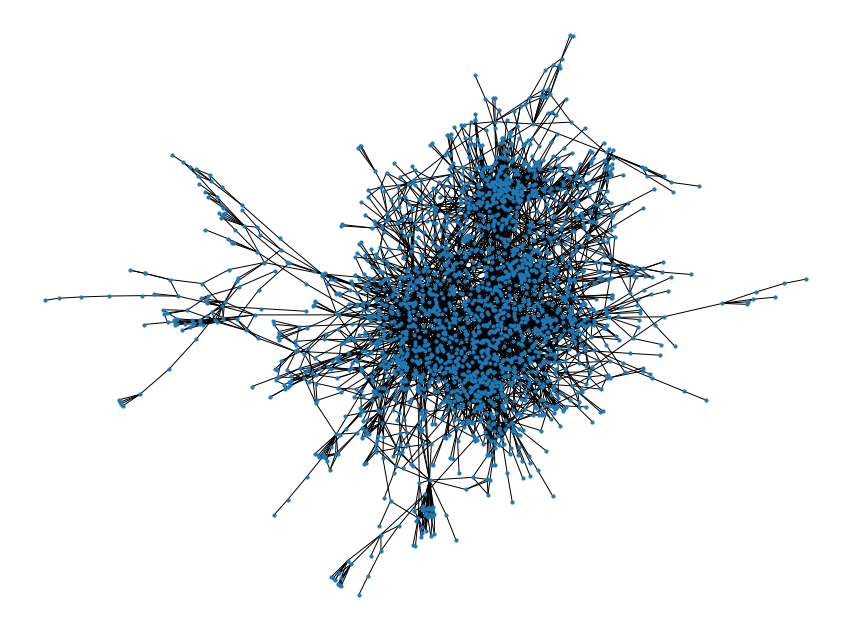

In [15]:
cc_graph = nx.Graph()
cc_graph.add_edges_from(new_edg_list)
draw_graph(cc_graph)

In [16]:
cc_graph.nodes()

NodeView((35.0, 1033.0, 103482.0, 103515.0, 1050679.0, 1103960.0, 1103985.0, 1109199.0, 1112911.0, 1113438.0, 1113831.0, 1114331.0, 1117476.0, 1119505.0, 1119708.0, 1120431.0, 1123756.0, 1125386.0, 1127430.0, 1127913.0, 1128204.0, 1128227.0, 1128314.0, 1128453.0, 1128945.0, 1128959.0, 1128985.0, 1129018.0, 1129027.0, 1129573.0, 1129683.0, 1129778.0, 1130847.0, 1130856.0, 1131116.0, 1131360.0, 1131557.0, 1131752.0, 1133196.0, 1133338.0, 1136814.0, 1137466.0, 1152421.0, 1152508.0, 1153065.0, 1153280.0, 1153577.0, 1153853.0, 1153943.0, 1154176.0, 1154459.0, 116552.0, 12576.0, 128540.0, 132806.0, 135130.0, 141342.0, 141347.0, 148170.0, 15670.0, 1688.0, 175291.0, 178727.0, 18582.0, 190697.0, 190706.0, 1956.0, 197054.0, 198443.0, 198653.0, 206371.0, 210871.0, 229635.0, 231249.0, 248425.0, 249421.0, 254923.0, 259701.0, 259702.0, 263279.0, 263498.0, 265203.0, 273152.0, 27510.0, 28290.0, 286500.0, 287787.0, 28851.0, 289779.0, 289780.0, 289781.0, 307015.0, 335733.0, 33904.0, 33907.0, 35061.0, 38

In [17]:
def get_nodes_labels():
    path1 = "D:\MSCS\GraphMining\GM_VE\gm_project\data\datasets-master\cora\cora_content.csv"
    x_d = {}
    with open(path1) as f:
        next(f)
        for line in f:
            #print(len(line))
            x = line.split(",")
            node_id = float(x[0])
            node_label = x[-1]
            x_d[node_id] = node_label
            #pos[str(k)] = (x,y)
            #k = k+1
    #data_knn = np.array(x_tp)
    return x_d
    
    

In [18]:
label_dict = get_nodes_labels()

In [19]:
unique_node_labels = [label_dict[i] for i in label_dict.keys()]
label_map = {l: i for i, l in enumerate(np.unique(unique_node_labels))}


In [20]:
label_map

{'Case_Based\n': 0,
 'Genetic_Algorithms\n': 1,
 'Neural_Networks\n': 2,
 'Probabilistic_Methods\n': 3,
 'Reinforcement_Learning\n': 4,
 'Rule_Learning\n': 5,
 'Theory\n': 6}

In [21]:
import pickle
with open ('D:/MSCS/GraphMining/GM_VE/gm_project/node_embeddings/nodeids', 'rb') as fp:
    itemlist = pickle.load(fp)

In [22]:
itemlist

['35',
 '6213',
 '1365',
 '3229',
 '910',
 '3231',
 '4330',
 '114',
 '19621',
 '2440',
 '1272',
 '4584',
 '6214',
 '887',
 '24966',
 '8224',
 '2665',
 '20193',
 '12576',
 '10169',
 '643221',
 '12182',
 '22563',
 '31353',
 '82920',
 '3191',
 '12350',
 '8703',
 '15429',
 '39890',
 '6334',
 '3220',
 '2696',
 '35922',
 '2653',
 '2658',
 '210871',
 '16819',
 '4804',
 '23738',
 '10177',
 '10796',
 '35061',
 '153063',
 '85352',
 '1688',
 '5348',
 '34257',
 '117',
 '39127',
 '5086',
 '230879',
 '5064',
 '4335',
 '54129',
 '1481',
 '642894',
 '6910',
 '35797',
 '20601',
 '41714',
 '108047',
 '205196',
 '22229',
 '36140',
 '65074',
 '54131',
 '31489',
 '28287',
 '3218',
 '79809',
 '17476',
 '38205',
 '3233',
 '10531',
 '28350',
 '45605',
 '33818',
 '23507',
 '18777',
 '89547',
 '126927',
 '6151',
 '3192',
 '2654',
 '1956',
 '46491',
 '6184',
 '45189',
 '287787',
 '6163',
 '753047',
 '77438',
 '84021',
 '6913',
 '3243',
 '12195',
 '1997',
 '20602',
 '56115',
 '78557',
 '202639',
 '5069',
 '20924'

In [23]:
node_colours = [label_map[label_dict[float(target)]] for target in itemlist]

In [51]:
node_colours

[1,
 4,
 2,
 2,
 2,
 6,
 3,
 4,
 2,
 5,
 6,
 4,
 4,
 1,
 6,
 6,
 2,
 0,
 1,
 6,
 3,
 6,
 2,
 2,
 1,
 3,
 6,
 5,
 6,
 3,
 0,
 2,
 2,
 3,
 6,
 2,
 1,
 3,
 6,
 6,
 6,
 0,
 1,
 3,
 1,
 1,
 2,
 2,
 4,
 5,
 3,
 2,
 0,
 3,
 1,
 0,
 3,
 2,
 2,
 6,
 1,
 1,
 2,
 1,
 6,
 3,
 1,
 3,
 4,
 5,
 6,
 4,
 1,
 3,
 2,
 4,
 1,
 2,
 2,
 3,
 6,
 3,
 4,
 3,
 6,
 0,
 6,
 4,
 6,
 1,
 4,
 6,
 3,
 1,
 3,
 6,
 6,
 3,
 6,
 1,
 2,
 2,
 0,
 3,
 0,
 1,
 2,
 4,
 3,
 0,
 1,
 6,
 3,
 6,
 0,
 6,
 1,
 0,
 2,
 1,
 2,
 6,
 0,
 2,
 5,
 2,
 2,
 0,
 6,
 2,
 2,
 2,
 2,
 6,
 2,
 0,
 1,
 6,
 4,
 4,
 1,
 6,
 3,
 6,
 3,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 0,
 1,
 3,
 3,
 0,
 1,
 0,
 3,
 2,
 5,
 5,
 3,
 6,
 2,
 4,
 5,
 1,
 1,
 2,
 0,
 6,
 0,
 3,
 0,
 3,
 1,
 0,
 2,
 3,
 2,
 4,
 4,
 2,
 6,
 0,
 2,
 3,
 5,
 2,
 3,
 3,
 6,
 0,
 5,
 3,
 1,
 2,
 5,
 1,
 2,
 6,
 0,
 2,
 2,
 2,
 2,
 0,
 6,
 2,
 5,
 3,
 4,
 4,
 1,
 1,
 3,
 0,
 1,
 2,
 2,
 4,
 1,
 4,
 6,
 6,
 4,
 6,
 3,
 2,
 4,
 2,
 3,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 4,
 2,
 0,
 3,
 1,
 4,
 3,
 3,
 0,


In [80]:
#node_colours = [label_map[label_dict[target]] for target in cc_graph.nodes()]


In [55]:
import pickle

with open('D:/MSCS/GraphMining/GM_VE/gm_project/node_embeddings/nodeids_default', 'wb') as fp:
    pickle.dump(list(cc_graph.nodes()), fp)

In [29]:
def draw_graph_labels(graph, node_colors):
    plt.figure(figsize=(15, 15))
    plt.axes().set(aspect="equal")
    pos = nx.spring_layout(graph, seed = 100) 
    nx.draw(graph,pos,node_color=node_colors, cmap=plt.cm.Set1, node_size=10)
    plt.show()

In [30]:
###### the graph with colored labels #####

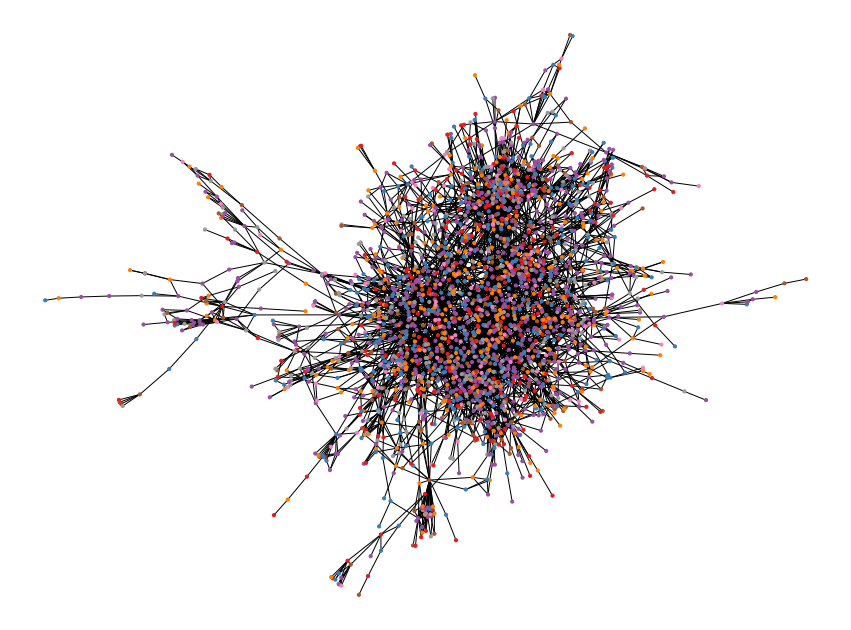

In [31]:
draw_graph_labels(cc_graph, node_colours)

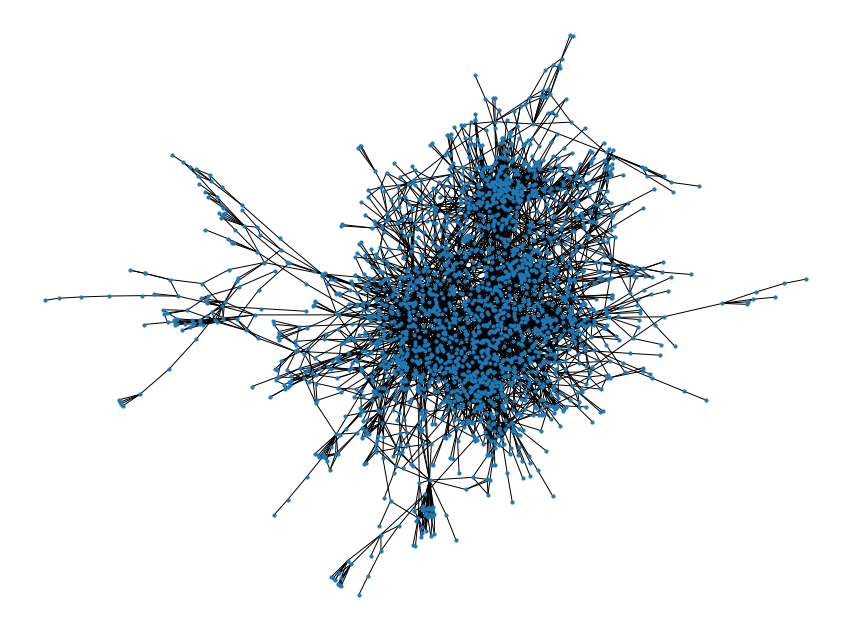

In [32]:
draw_graph(cc_graph)

In [33]:
##### Spectral Node Embeddings using eigen values and vectors ############
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances, rbf_kernel
from scipy.linalg import eigvals as eigs
from numpy import linalg as LA
from sklearn.cluster import KMeans
import sys
from scipy.sparse.linalg import eigsh
from scipy.cluster.vq import kmeans2

In [38]:
position = nx.spring_layout(cc_graph, seed = 100) 
Graph_Lp = nx.normalized_laplacian_matrix(cc_graph,position)
eigenvalues, eigenvectors = eigsh(Graph_Lp.todense(), k=25)

In [39]:
eigenvectors.shape

(2485, 25)

In [40]:
transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(eigenvectors)

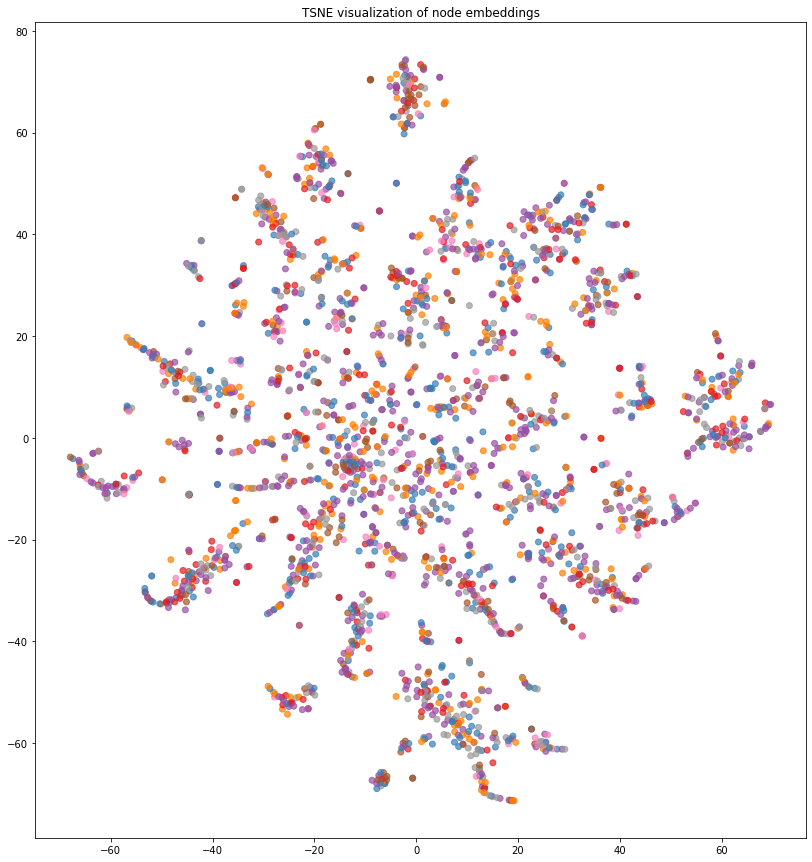

In [41]:
#nd_color = [label_map[label_dict[float(target)]] for target in range(1,eigenvectors.shape[0]+1)]

plt.figure(figsize=(15, 15))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap=plt.cm.Set1,
    alpha=0.7,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()

In [107]:
np.savetxt("D:/MSCS/GraphMining/GM_VE/gm_project/node_embeddings/eig_map_values_d128.csv", eigenvectors, delimiter=',')

In [24]:
##### HOPE #######
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.io as sio
import scipy.sparse as sp
import scipy.sparse.linalg as lg
from time import time
    

In [25]:
def learn_embedding(graph,d,beta):
    

        t1 = time()
        # A = nx.to_scipy_sparse_matrix(graph)
        # I = sp.eye(graph.number_of_nodes())
        # M_g = I - self._beta*A
        # M_l = self._beta*A
        A = nx.to_numpy_matrix(graph)
        M_g = np.eye(len(graph.nodes)) - beta * A
        M_l = beta * A
        S = np.dot(np.linalg.inv(M_g), M_l)

        u, s, vt = lg.svds(S, k= d // 2)
        X1 = np.dot(u, np.diag(np.sqrt(s)))
        X2 = np.dot(vt.T, np.diag(np.sqrt(s)))
        t2 = time()
        X = np.concatenate((X1, X2), axis=1)

        p_d_p_t = np.dot(u, np.dot(np.diag(s), vt))
        eig_err = np.linalg.norm(p_d_p_t - S)
        print('SVD error (low rank): %f' % eig_err)
        return X, (t2 - t1)



In [33]:
hope_embd, exe_t = learn_embedding(cc_graph, 25, 0.01)

SVD error (low rank): 0.956724


In [34]:
hope_embd.shape

(2485, 24)

In [48]:
transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(eigenvectors)

In [35]:
np.savetxt("D:/MSCS/GraphMining/GM_VE/gm_project/node_embeddings/hope_map_values_d25.csv", hope_embd, delimiter=',')

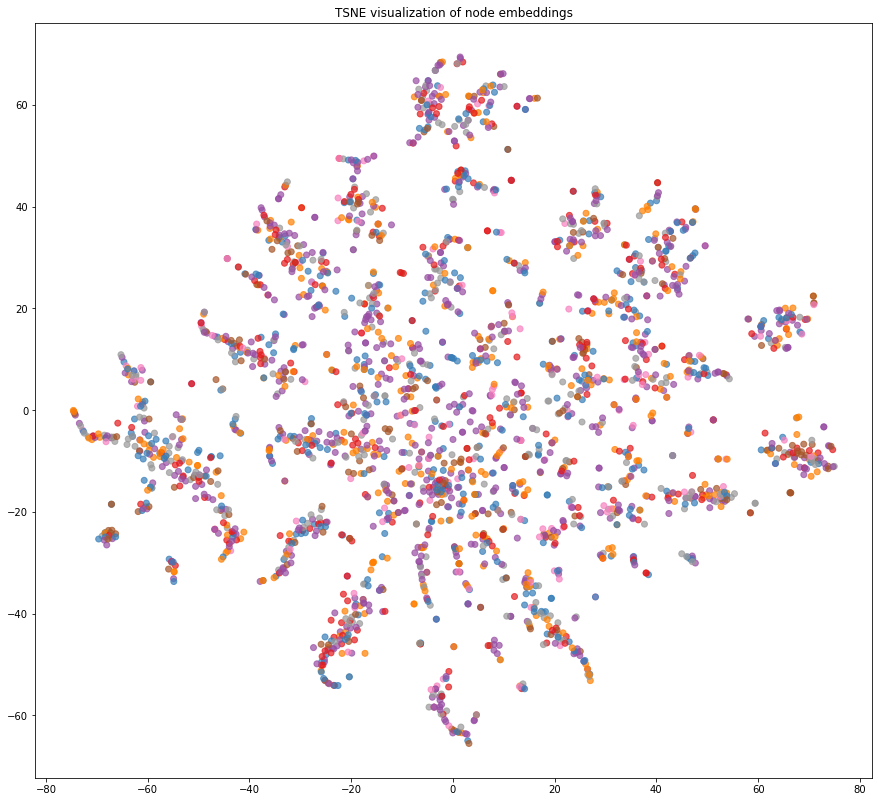

In [52]:
#node_colours = [label_map[label_dict[target]] for target in cc_graph.nodes()]

plt.figure(figsize=(15, 15))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap=plt.cm.Set1,
    alpha=0.7,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()

In [3]:
dataset = datasets.Cora()
G, node_subjects = dataset.load(largest_connected_component_only=True)

(<stellargraph.core.graph.StellarGraph at 0x1f288c17128>,
 31336             Neural_Networks
 1061127             Rule_Learning
 1106406    Reinforcement_Learning
 13195      Reinforcement_Learning
 37879       Probabilistic_Methods
                     ...          
 1128975        Genetic_Algorithms
 1128977        Genetic_Algorithms
 1128978        Genetic_Algorithms
 117328                 Case_Based
 24043             Neural_Networks
 Name: subject, Length: 2708, dtype: object)

TypeError: 'StellarGraph' object is not iterable

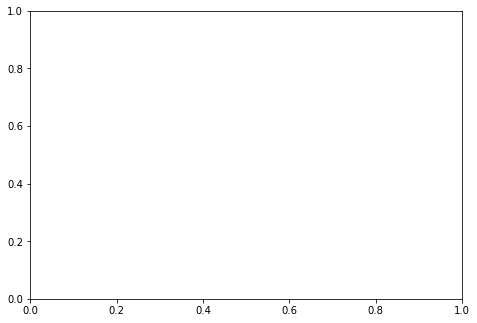

In [13]:
draw_graph(G)